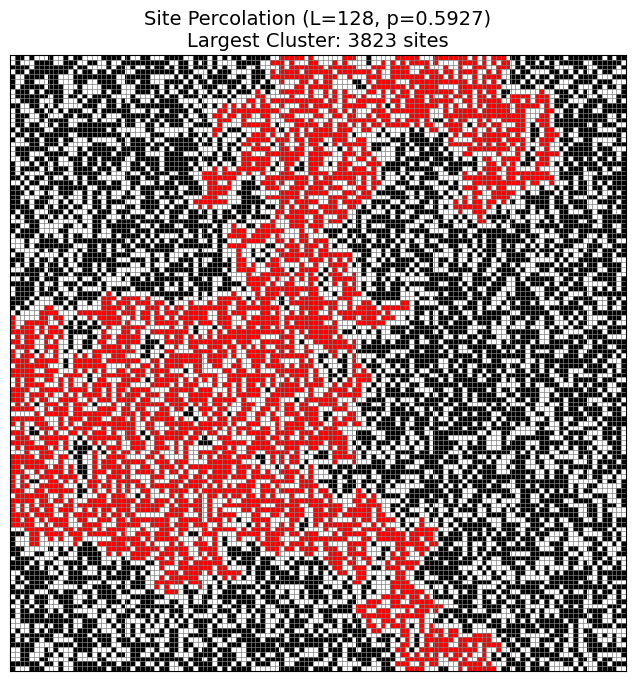

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 128  # Grid size (L x L)
p = 0.5927  # Occupation probability

# Generate random grid
np.random.seed(42)  # For reproducibility
grid = np.random.random((L, L))
occupancy = grid < p  # True = occupied, False = empty

# Cluster identification using DFS
visited = np.zeros((L, L), dtype=bool)
labels = np.zeros((L, L), dtype=int)
cluster_sizes = {}
current_label = 1
directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]  # 4-connectivity

for i in range(L):
    for j in range(L):
        if occupancy[i, j] and not visited[i, j]:
            stack = [(i, j)]
            visited[i, j] = True
            cluster_points = []
            
            while stack:
                x, y = stack.pop()
                cluster_points.append((x, y))
                for dx, dy in directions:
                    nx, ny = x + dx, y + dy
                    if (0 <= nx < L and 0 <= ny < L and 
                        occupancy[nx, ny] and not visited[nx, ny]):
                        visited[nx, ny] = True
                        stack.append((nx, ny))
            
            # Label the cluster and record its size
            size = len(cluster_points)
            for (x, y) in cluster_points:
                labels[x, y] = current_label
            cluster_sizes[current_label] = size
            current_label += 1

# Find largest cluster
largest_cluster_label = 0
max_size = 0
for label, size in cluster_sizes.items():
    if size > max_size:
        max_size = size
        largest_cluster_label = label

# Create RGB image: white=empty, black=occupied, red=largest cluster
image = np.ones((L, L, 3))  # Start with white background (RGB=1,1,1)
occupied_mask = occupancy.copy()

# Set occupied sites to black
image[occupied_mask] = [0, 0, 0]

# Color largest cluster red if exists
if largest_cluster_label > 0:
    largest_mask = (labels == largest_cluster_label)
    image[largest_mask] = [1, 0, 0]  # Red

# Create figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot image with grid lines
ax.imshow(image, interpolation='none', extent=[0, L, 0, L], origin='lower', zorder=0)
ax.set_xticks(np.arange(0, L+1))
ax.set_yticks(np.arange(0, L+1))
ax.grid(which='both', color='gray', linestyle='-', linewidth=0.5, zorder=1)
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

# Add title
plt.title(f"Site Percolation (L={L}, p={p})\nLargest Cluster: {max_size} sites", fontsize=14)

# Save as PDF
plt.savefig('percolation_largest_cluster.pdf', bbox_inches='tight')
plt.show()

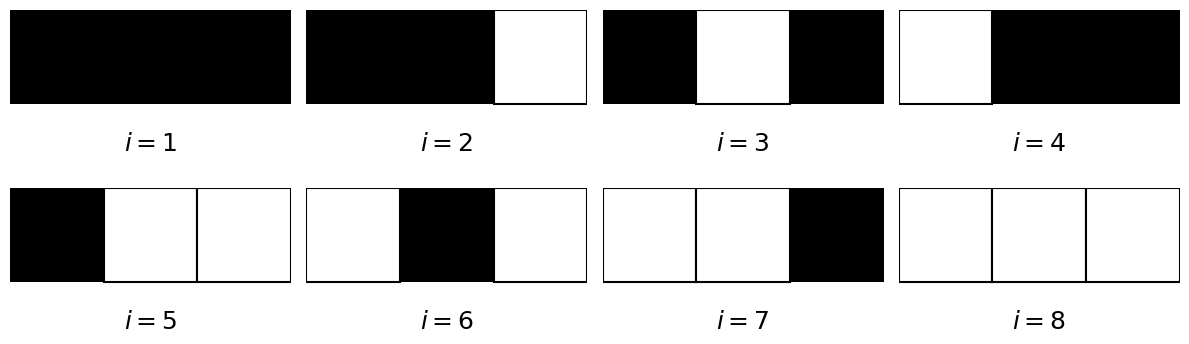

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import product

# Generate all configurations and reverse the order
configs = list(product([0, 1], repeat=3))[::-1]

# Swap the 4th and 5th configuration (indices 3 and 4)
configs[3], configs[4] = configs[4], configs[3]

# Create the figure
fig, axs = plt.subplots(2, 4, figsize=(12, 4))
axs = axs.flatten()

for idx, (ax, config) in enumerate(zip(axs, configs)):
    ax.set_aspect('equal')
    ax.axis('off')
    # Draw each of the 3 cells
    for i, cell in enumerate(config):
        if cell == 1:
            square = patches.Rectangle((i, 0), 1, 1, facecolor='black')
        else:
            square = patches.Rectangle((i, 0), 1, 1, facecolor='white', edgecolor='black', linewidth=1.5)
        ax.add_patch(square)
    # Label below each configuration
    ax.text(1.5, -0.3, f"$i = {idx + 1}$", ha='center', va='top', fontsize=18)
    ax.set_xlim(0, 3)
    ax.set_ylim(-0.5, 1)

plt.tight_layout()
# Save the figure
plt.savefig("lattice_configurations.png", dpi=300, bbox_inches='tight')
plt.show()


In [2]:
num = 243
print(num**(1/3))

6.240251469155711
